In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition

### Silhouette analysis on KMeans clustering

- Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot 
displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a 
way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

- Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away 
from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

- We use the silhouette analysis to choose an optimal value for n_clusters. The silhouette plot shows that the n_clusters value of 5, 6 and 7 are a bad pick for the given data due to the presence of clusters with below average silhouette scores and also due to wide fluctuations in the size of the silhouette plots. Silhouette analysis is more ambivalent in deciding in 4.

- Also from the thickness of the silhouette plot the cluster size can be visualized. The silhouette plot for cluster 0 when n_clusters is equal to 2, is bigger in size owing to the grouping of the 3 sub clusters into one big cluster. However when the n_clusters is equal to 4, all the plots are more or less of similar thickness and hence are of similar sizes as can be also verified from the labelled scatter plot below.

In [2]:
# Load the data in
data = pd.read_csv("movie_metadata.csv");

# Drop missing values
data = data.dropna();

In [3]:
# Select the ones needed
data = data.select_dtypes(include=[np.number])

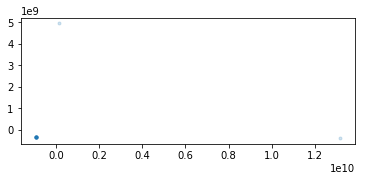

In [4]:
# Use PCA to clean up the data
pca = decomposition.PCA(n_components=data.shape[1], whiten=False)
B = pca.fit_transform(data.T).T
plt.subplot(111,aspect='equal')
plt.plot(B[0,:],B[1,:], '.', alpha=0.2);

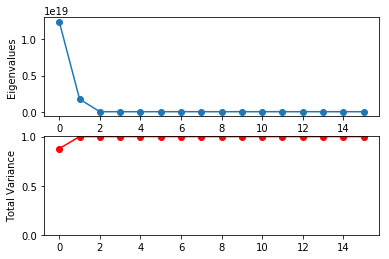

In [5]:
E, L = pca.components_.T, pca.explained_variance_
plt.subplot(211); plt.plot(L,'o-'); plt.ylabel('Eigenvalues');
plt.subplot(212); cl=np.cumsum(L); plt.ylabel('Total Variance');
plt.plot(cl/cl[-1],'o-r'); plt.ylim(0,None);

For n_clusters = 2 The average silhouette_score is : 0.9922679416101432
For n_clusters = 3 The average silhouette_score is : 0.9686814109518767
For n_clusters = 4 The average silhouette_score is : 0.6830793806537898
For n_clusters = 5 The average silhouette_score is : 0.573198491702601
For n_clusters = 6 The average silhouette_score is : 0.5732358188197675
For n_clusters = 7 The average silhouette_score is : 0.5764189565741226
For n_clusters = 8 The average silhouette_score is : 0.48530005683771643
For n_clusters = 9 The average silhouette_score is : 0.4577543723114919


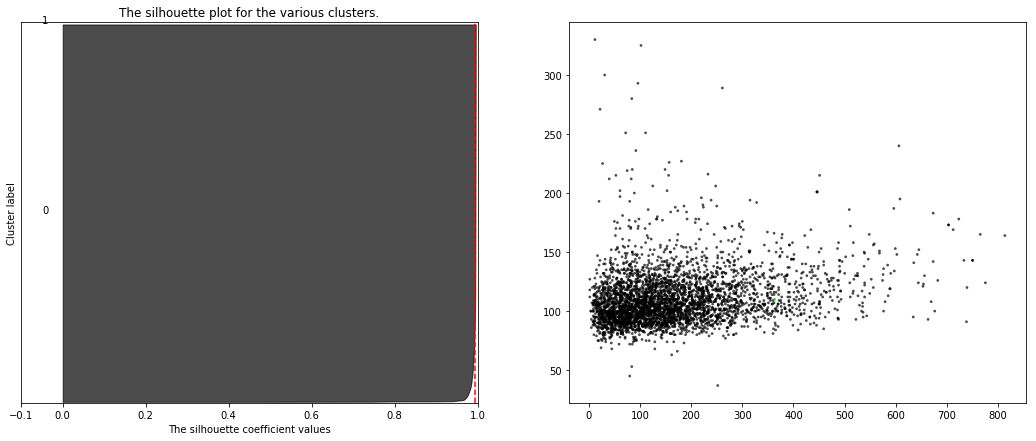

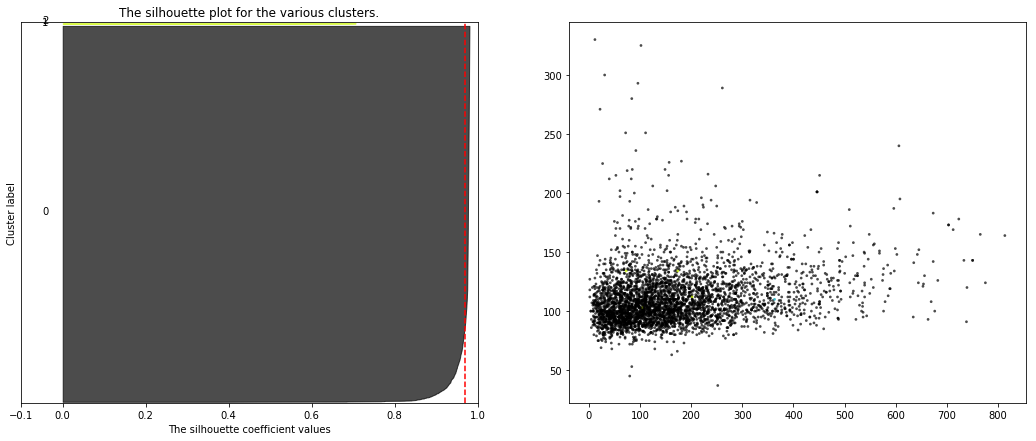

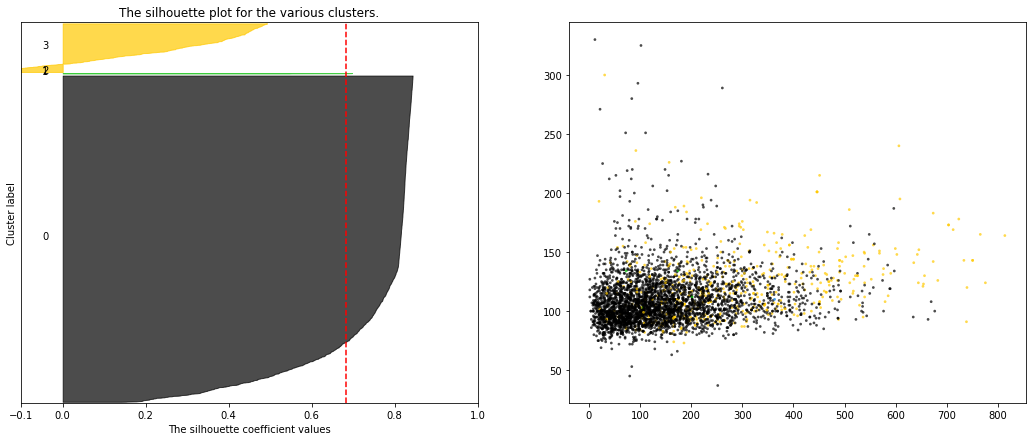

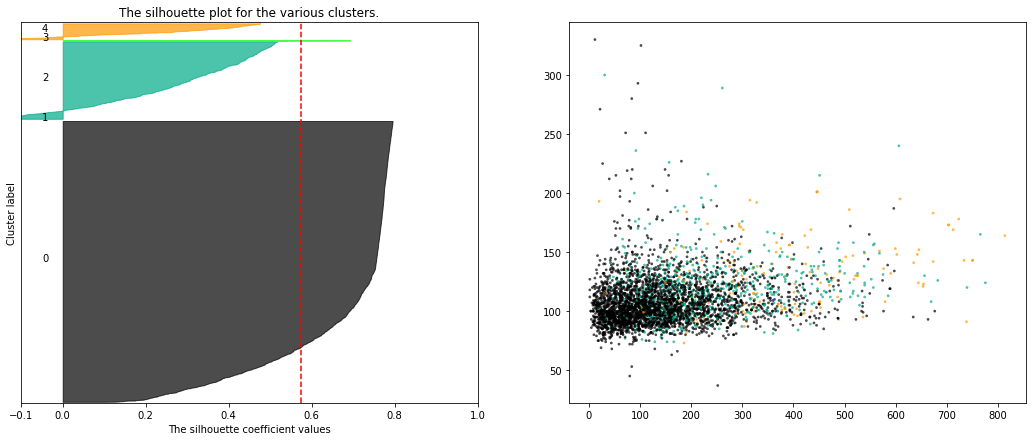

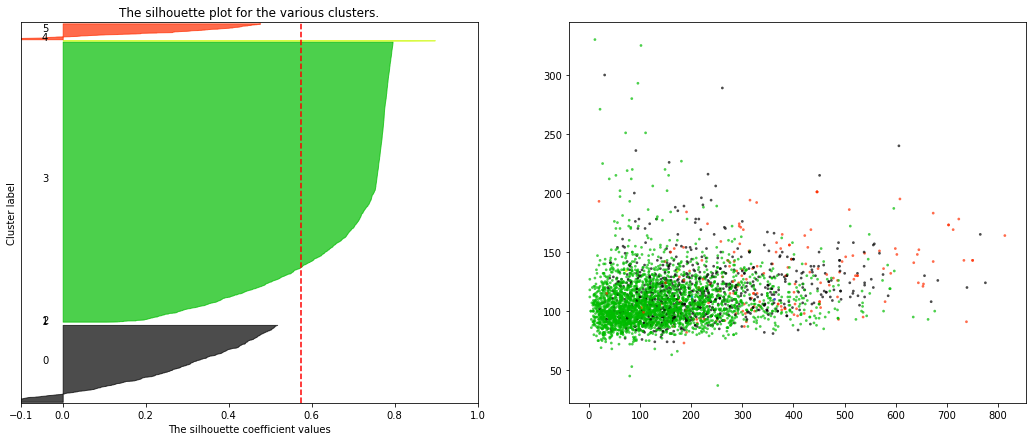

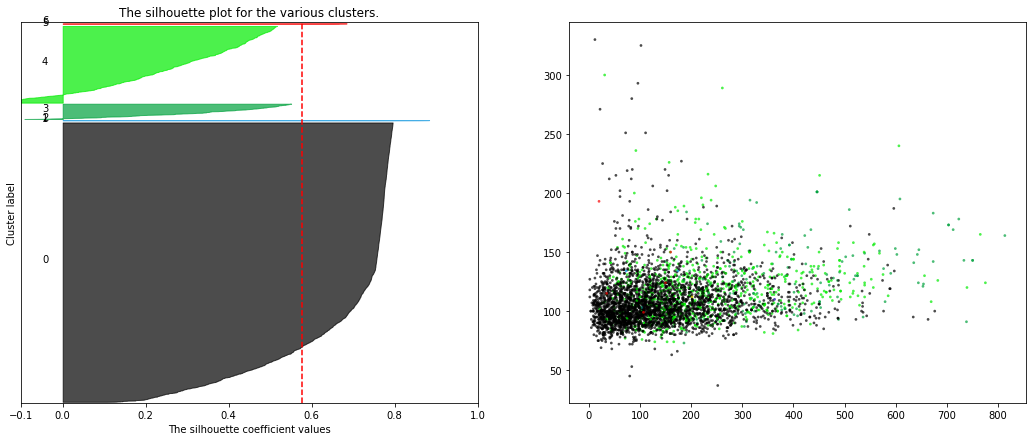

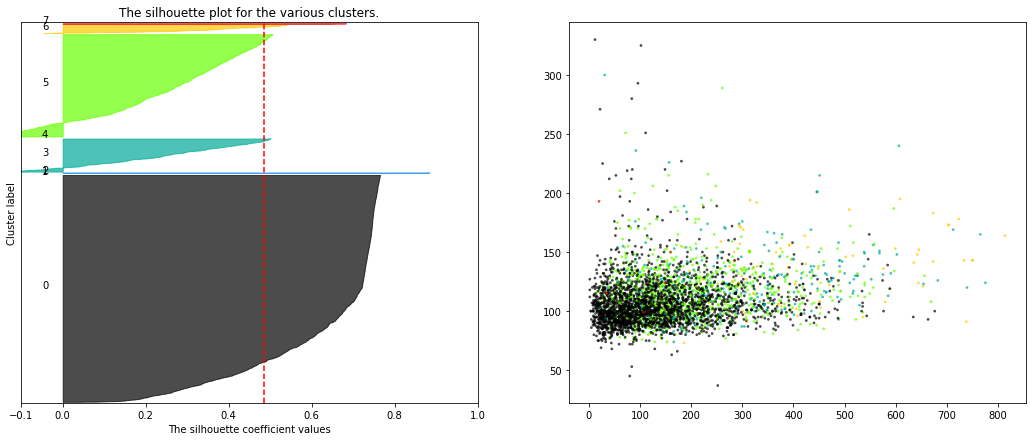

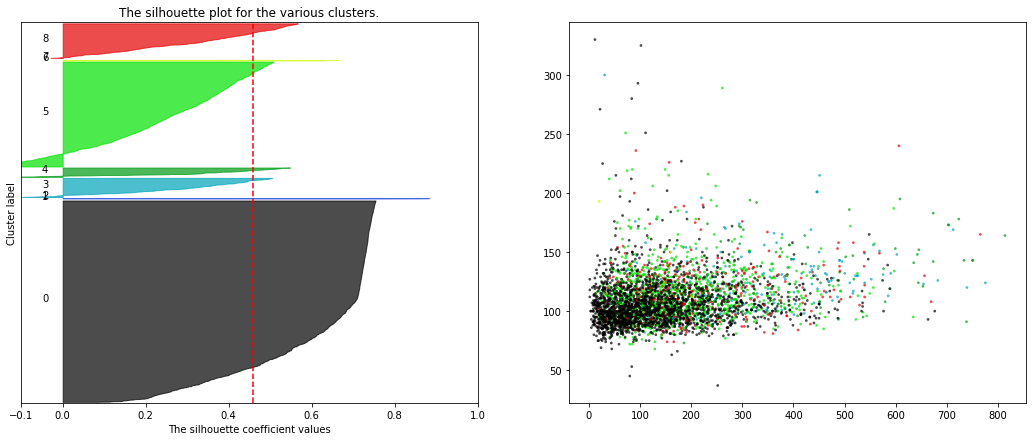

In [9]:
from __future__ import print_function

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

#range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16];
range_n_clusters = [2, 3, 4]; # For testing

X = data.values;
X = X.copy(order='C')
scores = [];

#for n_clusters in range_n_clusters:
for n_clusters in range(2,10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.  
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, copy_x=False)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    scores.append(silhouette_avg);
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
               c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_

plt.show()




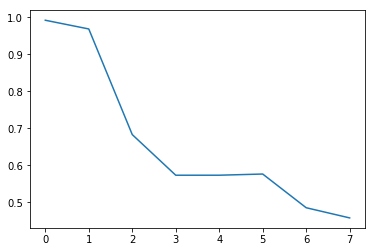

In [10]:
plt.plot(scores);

### References

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

[ndarry was not C-continugous](https://stackoverflow.com/questions/26778079/valueerror-ndarray-is-not-c-contiguous-in-cython)